<center>
    
# Modelling, Simulation and Optimisation Project

<center>
    <i><b>SUBMITTED BY:</b>

<font color=blue>

<center>Sobil Dalal<br> 
<center>School of Computing<br> 
<center>National College of Ireland<br>
<center>Dublin, Ireland<br>
<center>x19148496@student.ncirl.ie</i>


# Problem

<b>The Context:</b>

- A high-speed train as planned for the HS2 line from London to Birmingham has a maximum acceleration of 0.76m/s2, about the same as a commuter train. While the trains can brake in an emergency at 2.5m/s2, the energy optimal deceleration (using regenerative braking) is 0.38m/s2.
- The maximum travelling speed of the train is about 310km/h (86.1m/s). For the purpose of this project we will ignore the impact of air resistance. That means we assume a constant acceleration up to maximum speed. Accelerating from 0 to the maximum speed takes therefore 113.3s during which time the train travels about 4,878m.
- A railway line consists of a sequence of signaling blocks. A train is only allowed to enter a block, when there is no other train in the block and the entry signal is green. When a train enters a block the entry signal switches to red. The entrance signal switches back to green 5 seconds after the end of the train has left the block.
- We assume for the purpose of this project that the signalling blocks have all equal length. Depending on the speed of a train it requires a number of free blocks ahead of it, to maintain the current speed. This speed is determined so that the train is guaranteed to stop safely before a red signal.
- This results in a trade-off. When the speed of the train is slower, it is possible to have more trains on the track, as there are less free blocks required between the trains. The faster a train the more free blocks are required in front of the train to continue maintaining the high speed.
- Given a number of blocks along a track there will be an optimal point for the number of trains per hour that could be run on the track at full speed.
- The control problem is to keep the trains moving at maximum possible safe speed. If there is a slight delay in one train it may cause the train in the following block to decelerate potentially down to stop and then to reaccelerate, which in turn will delay the train thereafter. Just like the “traffic jam” effect you know from the motorway. A train can run constantly at full speed if there is always at least the required number of free blocks ahead.

<b>Part 1 Simulation:</b>

- Create a simulation for the London Old Oak Commons to Birmingham Interchange section of the high-speed line. The distance between London Old Oak Common Station and Birmingham Interchange Station is 145km. Assume that the track consists of k signalling blocks of equal length and that a fixed train schedule of n trains per hour is to be used.
- Verify the simulation model by inducing a temporary break down due to electrical malfunction of the 9am train from London to Birmingham. It takes 30 minutes to fix the problem.
- To reflect operational conditions introduce variability of travelling times using a suitable distribution on events. You can choose the distribution and the parameters as you deem appropriate. It may be useful to consider two types of variations: normal deviations (of just a few minutes for example caused by common weather events or delays in departure due to passenger movements), and rare events with bigger impact (like heavy rain or technical problems) that may impact also on later trains. Yuxiang Yang et al [1] report a log-normal distribution with μ= 3.378 and σ=0.751 for the delay times (in minutes( on a segment of a comparable Chinese high-speed train (including the knock-on effect on the following trains).

<b>Part 2 Optimisation:</b>

- For given parameters k and n create a train schedule that sets out the departure and arrival time for trains with the first train leaving at 7am and the last train leaving at 10pm. Using the simulation created in part 1 report the distribution of actual delay times. The aim is to maximise the number of trains operating per hour under the constraint that the average delay time should not be higher than half the scheduled time between consecutive trains. Report your recommendation for the layout of the track (k) and the schedule (n).

## Learning from the problem

### Train properties are:
<ol>
  <li>Max acceleration = 0.76 m/$s^{2}$</li>
  <li>Emergency deceleration = 2.5 m/$s^{2}$</li>
  <li>Normal deceleration = 0.38 m/$s^{2}$</li>
  <li>Max speed = 86.1 m/s</li>

  Assumption from the question: Air resistance is ignored.
    <font color=green>
  <li>Time to achieve max speed = tA = 113.3 s</li>
  <li>Distance covered to achieve max speed = dA = 4,878 m</li>
</ol>


### Signalling blocks properties are:
<ol>
  <li>Size = equal</li>
  <li>Dwell time = 5s</li>
</ol>

### Stations properties from London Old Oak Commons to Birmingham Interchangeare are:
<ol>
  <li>Distance = 145 km = 1,45,000 m</li>
    <font color=green>
  <li>Number of trains per hour = n = ?</li>
  <li>Number of signalling blocks between stations = k = ?</li>
</ol>

### Incident properties are:
<ol>
  <li>Duration = 30 min = 1800s</li>
  <li>Start time = 9am</li>
</ol>

### Travelling time variablilty:
<ol>
  <li>Can be due to movement of passengers</li>
  <li>Can be due to weather.</li>
</ol>

## Assumptions from the question

- Impact of air resistance is ignored and that means a constant acceleration up to maximum speed.
- The signalling blocks have all equal length.
- Yuxiang Yang et al [1] report a log-normal distribution with μ= 3.378 and σ=0.751 for the delay times (in minutes( on a segment of a comparable Chinese high-speed train (including the knock-on effect on the following trains)

## Load Libraries and Plotting Routines

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import numpy as np
import statsmodels.api as sm
import pulp
import simpy
import random
import time
from sklearn.linear_model import LinearRegression
from scipy.optimize import linprog
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
def plot(data, xmin, xmax, pdf=None, bins=None, 
         μ=None, σ=None,
         
         title=None, xlabel=None, ylabel=None):
    
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(5)
    ax = fig.gca()
    
    μ = np.mean(data)
    σ = np.std(data)  
    minx = min(data)
    maxx = max(data)
        
    ax.set_xlim(xmin, xmax)
    
    if title!=None:
        plt.title(title)
        
    plt.hist(data, bins=bins, density=True)
    
    # calculate parameter for text positioning
    dx=(xmax-xmin)*0.02
    ymin, ymax=plt.ylim()
    ypos=ymin+0.9*(ymax-ymin)
     
    # plot the probability density function if one is given
    if pdf!=None:
        X = list(np.linspace(xmin, xmax, 100))
        Y = [ pdf(x) for x in X]
        plt.plot(X, Y, lw=2, color='red')
 
    ax.axvline(x=μ, color='red', linestyle='dashed', lw=2)
    plt.text(μ+dx, ypos, f"μ={μ:3.2f}", color='red', fontsize=14)
    
    ax.axvline(x=minx, color='red', linestyle=':')
    ax.axvline(x=maxx, color='red', linestyle=':')

        
    plt.grid(True)

In [3]:
def poissonPlot(data, pdf=None, title=None):
    μ = data.mean()
    n = data.count()
    max = math.ceil(data.max()/10)*10
    
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(5)
    
    ax = fig.gca()
    ax.set_xlim(0, max)
    
    if title!=None:
        ax.set_title(title+" (n={:,})".format(n))
        
    data.hist(ax=ax, bins=max+1 if max<100 else 100, density=True)

    x = [ i/10 for i in range(1, 10*max)]

    if pdf is None:
        y = [ 1/μ*math.exp(-x/μ) for x in x]
    else:
        y = [ pdf(x) for x in x]
    plt.plot(x, y, lw=3, color='red')
    ax.axvline(x=μ, color='red')
    plt.text(μ+0.2,0.9*y[0],'μ='+'%2.2f' % μ, color='red', fontsize=14)
    plt.grid(True)

In [4]:
def plotWithPdf(data, xmin, xmax, pdf=None, bins=None, 
         μ=None, σ=None,
         
         title=None, xlabel=None, ylabel=None):
    data= data
    xmin= xmin
    xmax=xmax
    pdf=pdf
    bins=bins
    μ=μ
    σ=σ
    title=title
    xlabel=xlabel
    ylabel=ylabel
    
    if title==None:
        title = ""
    else:
        title = title + " and sd ="
    
    σ = data.std()
    μ = data.mean()
    norm = stats.norm(loc=μ, scale=σ).pdf
    plot(data, pdf=norm, xmin=xmin, xmax=xmax, bins=bins, title=f"{title}{max((μ-data.min())/σ,  (data.max()-μ)/σ):3.1f}σ")
    #print(f"{max((μ-arr.min())/σ,  (arr.max()-μ)/σ):3.1f}σ")


## Prepare Data


### Calculate time taken for a train to cross each block

In [5]:
def timeTo(k, acc, dec, maxV, dist):
    # acc     constant acceleration, m/s²
    # dec     constant deceleration, m/s²
    # maxV    maximumum velocity, m/s
    # dist    distance, m
    # return  time in seconds required to travel
    #
    dB = dist/k
    tA = maxV/acc         # time to accelerate to maxV
    dA = (acc*tA**2)/2       # distance traveled during acceleration from 0 to maxV and back to 0
    tD = maxV/dec
    dD = (dec*tD**2)/2
    
    if (dB < (dA + dD)):        # train never reaches full speed?
        return np.sqrt(2.0*dB/(acc*3)) + np.sqrt(4.0*dB/(dec*3))     # time needed to accelerate to 1/3 point then decelerate to destination
    else:
        return tA + tD + (dB-dA-dD)/maxV   # time to accelerate to maxV plus travel at maxV plus decelerate to destination

### Create a dataframe containing details of Blocks - from, to and direction

In [6]:
def inputData(K):
    inputData = pd.DataFrame()
    for i in range(K): 
                inputData.at[i, 'From'] = 'P' + str(i+1)
                inputData.at[i, 'To'] = 'P' + str(i+2)
                inputData.at[i, 'Block'] = 'B' + str(i+1)
                inputData.at[i,'Direction'] = "LOND-BIRM"
    
    return inputData   

### Create a dataframe with all details of Blocks

In [7]:
def blockData(k, mean, sigma, acc, dec, vel, dist):
    
    blockData = inputData(k)
    
    #Total distance can be splitted by number of blocka
    dT = 145000
    dB = dT/k
    
    blockData['Distance'] = dB
    blockData['Drive Time'] = int(timeTo(k, acc, dec, vel, dist))
    blockData['Dwell Time'] = np.random.lognormal(mean,sigma, size=k)
    blockData['Running Time'] = blockData['Dwell Time'] + blockData['Drive Time']

    return blockData

### Derived Details
<br>
<br>

<font color=green>
    
- Distance deceleration 
    &emsp;
    $$ distance_{deceleration} = \frac{Speed_{intial}^2 - Speed_{final}^2}{2*deceleration}$$

    $$ dD = \frac{86.1^2 - 0^2}{2*0.38} = 9,754.22 m$$
 
- Time deceleration
    &emsp;
    $$ time_{deceleration} = \frac{Speed{intial} - Speed_{final}}{deceleration}$$

    $$ tD = \frac{86.1 - 0}{0.38} = 226.6 s$$
    
- Total min distance for max speed 
    &emsp;
    $$dT = dA + dD $$
    $$dT = 4,878 + 9,754.22 = 1,4632.22m $$

- Total min time for max speed 
    &emsp;
    $$tT = tA + tD $$
    $$tT = 113.3 + 226.6 = 339.9s $$

### Creating signaling block data

Taking the values from assumptions

In [8]:
random.seed(0)
blkData = blockData(k=6, mean=3.378, sigma=0.751, acc=0.76, dec=0.38, vel=86.1, dist=145000 )
blkData

,From,To,Block,Direction,Distance,Drive Time,Dwell Time,Running Time
0,P1,P2,B1,LOND-BIRM,24166.666667,450,20.072643,470.072643
1,P2,P3,B2,LOND-BIRM,24166.666667,450,25.765029,475.765029
2,P3,P4,B3,LOND-BIRM,24166.666667,450,19.429390,469.429390
3,P4,P5,B4,LOND-BIRM,24166.666667,450,10.706846,460.706846
4,P5,P6,B5,LOND-BIRM,24166.666667,450,104.297826,554.297826
5,P6,P7,B6,LOND-BIRM,24166.666667,450,75.511057,525.511057


## Exploratory Data Analysis

### Dwell Time

In [9]:
blkData["Dwell Time"].min()

10.706845818182497

In [10]:
blkData["Dwell Time"].max()

104.29782634510813

In [11]:
blkData["Dwell Time"].mean()

42.63046511512994

In [12]:
blkData["Dwell Time"].std()

38.038670755313895

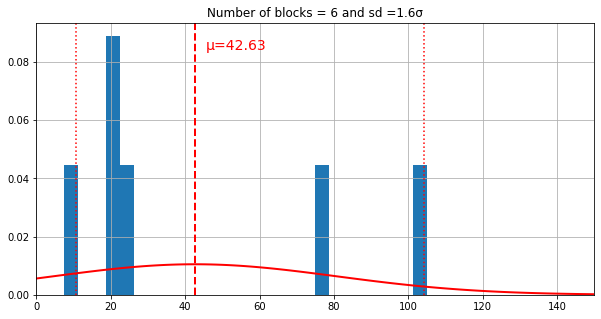

In [13]:
plotWithPdf(blkData['Dwell Time'], xmin=0, xmax=150, bins=np.linspace(0, 150, 41), title="Number of blocks = 6")

### Running Time

In [14]:
blkData["Running Time"].min()

460.7068458181825

In [15]:
blkData["Running Time"].max()

554.2978263451081

In [16]:
blkData["Running Time"].mean()

492.63046511512994

In [17]:
blkData["Running Time"].std()

38.038670755313895

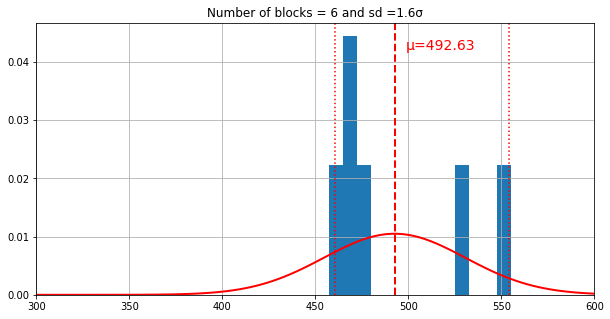

In [18]:
plotWithPdf(blkData["Running Time"], xmin=300, xmax=600, bins=np.linspace(300, 600, 41), title="Number of blocks = 6")

## Modeling

In [19]:
# To maintain sync
dt = blkData
dt

,From,To,Block,Direction,Distance,Drive Time,Dwell Time,Running Time
0,P1,P2,B1,LOND-BIRM,24166.666667,450,20.072643,470.072643
1,P2,P3,B2,LOND-BIRM,24166.666667,450,25.765029,475.765029
2,P3,P4,B3,LOND-BIRM,24166.666667,450,19.429390,469.429390
3,P4,P5,B4,LOND-BIRM,24166.666667,450,10.706846,460.706846
4,P5,P6,B5,LOND-BIRM,24166.666667,450,104.297826,554.297826
5,P6,P7,B6,LOND-BIRM,24166.666667,450,75.511057,525.511057


### The Infrastructure (Stations, Depots etc)

The class NetworkNode is used as the common base class for all infrastructure classes. Each NetworkNode (like a station) has a name and belongs to a track, i.e. a direction.

#### NetworkNode

In [20]:
class NetworkNode:

    def __init__(self, location):
        self.location=location
        self.tracing=False
        self.incidents=[]
        self.arr_time=[]
        self.dep_time=[]

    # is only used in connection with tracing
    def setTrack(self, track):
        self.track=track

    def isTracing(self):
        return self.tracing and self.track.isTracing()

    def trace(self):
        self.tracing=True

    def trace_prefix(self, train):
        global max_direction_length
        return f"{now():s} " \
               f"[Train {train.getNo():2d} " \
               f"{train.getDirection():{max_direction_length}s}]"

    def arr(self, train):
        self.arr_time.append(env.now)
        if self.isTracing() or train.isTracing():
            print(f"{self.trace_prefix(train):s} arr {self.loc():s}")

    def dep(self, train, dest):
        self.dep_time.append(env.now)
        if self.isTracing() or train.isTracing():
            print(f"{self.trace_prefix(train):s} dep {self.loc():s} for {dest.loc():s}")

    def loc(self):
        return self.location

    def __str__(self):
        return self.location
    
    def getResource(self):
        pass
    
    # trace output for incident
    def inc(self, train):
        if self.isTracing() or train.isTracing():
            delay=self.incidentDelay()
            message=f"expected delay {daytime(delay):s}" if delay>0 else "incident cleared"
            print(f"{self.trace_prefix(train):s} inc {self.loc():s} {message:s}")        
            
    # registers an incident
    def registerIncident(self, incident):
        self.incidents+=[incident]
        
    # checks if there is currently an incident in progress
    # if yes, it returns True otherwise False
    def isIncident(self):
        for inc in self.incidents:
            if inc.active():
                return True
        return False
        
    # if there is currently an incident in progress it returns
    # the time the incident will probably continue, otherwise it returns 0
    def incidentDelay(self):
        stopTime=0
        for incident in self.incidents:
            if incident.active():
                stopTime=max(stopTime, incident.stopTime())
        return 0 if stopTime==0 else stopTime-env.now
    
    def getArrivalTimes(self):
        return self.arr_time
    
    def getDepartureTimes(self):
        return self.dep_time

#### Depots

A train depot serves a line and feeds trains into a particular direction.
<font color=red>
           
- Below paramter as set as global parameters
       
- Assumed mean dwell time at station (Passenger onboarding and deboarding)= 10 
        
- Assumed mean drive time from the station to block = 20
    
- There is no signalling block in at the depot

In [21]:
class Depot(NetworkNode):
    def __init__(self, location, direction):
        super().__init__(location+" (DEPOT)")
        self.direction=direction
        self.dist_drive_time = \
        stats.expon(loc=depot_drive_time, 
                        scale=scale_drive(depot_drive_time))
        
        self.dist_dwell_time = \
            stats.norm(loc=depot_dwell_time, 
                       scale=scale_dwell(depot_dwell_time))

    def driveTime(self):
        return self.dist_drive_time.rvs()

    def dwellTime(self):
        x= self.dist_dwell_time.rvs()
        if x<0:
            x=1
        if x<5:
            x = x*3
        return x
    
    def dep(self, train, dest):
        train.setDirection(self.direction)
        super().dep(train, dest)
        
    def getResource(self):
        return None

#### Stations

A Station object describes a track in a physical station. Hence we use a station object for each of the directions of a line going through the station.

The common name of the physical station can be accessed as `loc()`.

<font color=red>
           
- Below paramter as set as global parameters
       
- Assumed mean dwell time at station (Passenger onboarding and deboarding)= 15 
        
- Assumed mean drive time from the station to block = 20
    
- Signalling is also mainted at stations with 5s time red to green signal after train leave the station

In [22]:
def scale_dwell(m):
    return min(0.3*m, 10)

def scale_drive(m):
    return min(0.2*m, 5)

In [23]:
class Station(NetworkNode):
    def __init__(self, location, direction):
        super().__init__(location+" (Station)")
        self.direction=direction
        self.resource=simpy.Resource(env, capacity=1)
        self.dist_drive_time = \
        stats.expon(loc=20, 
                        scale=scale_drive(station_drive_time))
        
        self.dist_dwell_time = \
            stats.norm(loc=15, 
                       scale=scale_dwell(station_dwell_time))

    def driveTime(self):
        return self.dist_drive_time.rvs()

    def dwellTime(self):
        x= self.dist_dwell_time.rvs()
        if x<0:
            x=1
        if x<5:
            x = x*3
        return x

    def dep(self, train, dest):
        train.setDirection(self.direction)
        super().dep(train, dest)
    
    def getResource(self):
        return self.resource

#### Signaling Block

In [24]:
class Block(NetworkNode):
    def __init__(self, location, direction):
        super().__init__(location)
        self.location=location
        self.direction=direction
        self.resource=simpy.Resource(env, capacity=1)

        dd=dt[dt['Direction']==self.direction]
        dd=dd[dd['From']==location]

        if len(dd)==0:
            # last node in a direction, the last passengers leave the train
            # and the train moves into the Cross-Over or the Depot
            self.drive_time=20
            self.dwell_time=60
        else:
            self.drive_time=dd.iloc[0].at['Drive Time']
            self.dwell_time=dd.iloc[0].at['Dwell Time']
            
        self.dist_drive_time = \
        stats.expon(loc=self.drive_time, 
                        scale=scale_drive(self.drive_time))
        
        self.dist_dwell_time = \
            stats.norm(loc=self.dwell_time, 
                       scale=scale_dwell(self.dwell_time))

    def driveTime(self):
        return self.dist_drive_time.rvs()
    
    def dwellTime(self):
        x= self.dist_dwell_time.rvs()
        if x<0:
            x=1
        if x<5:
            x = x*3
        return x

    def __str__(self):
        return self.location + " (" + self.direction[0] + ")"
    
    def getResource(self):
        return self.resource

#### Incidents

In [25]:
class Incident:
    
    def __init__(self, start, stop):
        self.start = parseTime(start)
        self.stop = parseTime(stop)
        
    def active(self):
        return self.start <= env.now and env.now <= self.stop
    
    def startTime(self):
        return self.start
    
    def stopTime(self):
        return self.stop

### Train

In [26]:
class Train(object):
    def __init__(self, i, track):
        self.no=i
        self.track = track

        self.direction = None
        self.tracing = False

    def setDirection(self, direction):
        self.direction=direction

    def getDirection(self):
        return self.direction
    
    def getNo(self):
        return self.no
    
    def isTracing(self):
        return self.track.isTracing() and \
                (not self.track.isTracingTrains() or self.tracing)
    
    def trace(self):
        self.tracing=True
            
    def traceOff(self):
        self.tracing=False

    def process(self):

        blocks = self.track.getBlocks()

        here=blocks[0]
        here_req = None

        for dest in blocks[1:]:

            drivetime=here.driveTime()
            dwelltime=here.dwellTime()

            yield env.timeout(dwelltime)
            
            if here.isIncident():
                here.inc(self)
                yield env.timeout(here.incidentDelay())
                here.inc(self)
            
            if dest.getResource() is not None:
                dest_req = dest.getResource().request()
                yield dest_req
            else:
                dest_req = None
                
            # if the train doesn't get immediate access, it continues waiting 
            # in the current station ('here').
            # if the train got access the train departs from 'here'for 'dest'

            here.dep(self, dest)

            # Once the train has completely left the station, the train
            # will release the track of station ('here'). 
            # We assume that the train has left the station after 10 secs  
            delaytime=min(drivetime, signalFreeTime)
            yield env.timeout(delaytime)
            if here_req is not None:
                here.getResource().release(here_req)

            # the train proceeds to drive to the next station ('dest')
            yield env.timeout(drivetime-delaytime)

            dest.arr(self)
            here = dest
            here_req=dest_req



### Tracks

A track describes a direction of a line. The parameters describing a track are:
- The start and stop times of the line (for example 6:00 to 23:00),
- The time between trains (for example every 5 minutes), but this may vary during the day.

In [27]:
class Track(object):
    def __init__(self, network, direction, depot, blocks):
        self.network=network
        self.direction=direction
        
        # extract line specific parameters
        self.start = dt.at[0, 'start']
        self.stop  = dt.at[0, 'stop']
        self.freq  = dt.at[0, 'freq']

        self.track=[depot]+blocks
        for s in self.track:
            s.setTrack(self)

        self.tracing=False
        self.tracingTrains=False
        self.tracingTrainNos=[]


    def isTracing(self):
        return self.tracing and self.network.isTracing()

    def isTracingTrains(self):
        return self.tracingTrains and self.network.isTracing()
                
    def trace(self, loc=None, train=None):
        self.tracing=True
        if loc is None:
            for s in self.track:
                s.trace()
            if train is not None:
                self.tracingTrains=True
                self.tracingTrainNos.append(train)
        else:
            for s in self.track:
                if s.loc()==loc:
                    s.trace()
            if train is not None:
                self.tracingTrains=True
                self.tracingTrainNos.append(train)

    def getNetwork(self):
        return self.network

    def getLine(self):
        return self.line
    
    def getName(self):
        if self.direction is None:
            return self.line
        else:
            return self.line + " ("+self.direction+")"

    def getBlocks(self):
        return self.track

#     def setTiming(self, start, stop, timing):
#         self.start=start*3600
#         self.stop=stop*3600
#         self.timing=timing

    def process(self):
        yield env.timeout(self.start-env.now) # the line starts operating at 6am
        for i in range(int((self.stop-self.start)/self.freq)):
            t=Train(i, self)
            if self.tracingTrains and i in self.tracingTrainNos:
                t.trace()
            env.process(t.process())
            yield env.timeout(self.freq)
            
    def getArrData(self):
        n=len(self.track[1].getArrivalTimes())-1
        sd=pd.DataFrame(index=range(n))
        for s in self.track:
            if isinstance(s, Station):
                col = s.loc()+" ("+s.direction[0]+")"
                sd[col+" IARR" ]= [ s.arr_time[i+1]-s.arr_time[i] for i in range(n)]
                sd[col+" ARR" ]= [s.arr_time[i] for i in range(n)]
        return sd
    
    def getDepData(self):
        n=len(self.track[1].getDepartureTimes())-1
        sd=pd.DataFrame(index=range(n))
        for s in self.track:
            if isinstance(s, Station):
                dep_col=s.loc()+" ("+s.direction[0]+")"
                sd[dep_col+" IDEP"]=[s.dep_time[i+1]-s.dep_time[i] for i in range(n)]
                sd[dep_col+" DEP" ]= [s.dep_time[i] for i in range(n)]
        return sd

    def __str__(self):
        direction = "" if self.direction is None else " ("+self.direction+")"
        stations = " - ".join([ str(s) for s in self.track ])
        return direction + ": " + stations

### The Network

In [28]:
def allBlocks(direction):
    ds=dt[dt['Direction']==direction]
    blocks=dt['From'].to_list()
    blocks+=[dt['To'].to_list()[-1]]
    return [ Block(s, direction) for s in blocks ]

In [29]:
def allTracks(network):
    lines=[]
    
    directions=dt['Direction'].unique()
    blocks=[ allBlocks(d) for d in directions]
    
    depot = Depot("LOND", directions[0])
    station = Station("LOND", directions[0])
    depotL = Depot("BIRM", directions[0])
    stationL = Station("BIRM", directions[0])
    l = Track(network, None, depot, [station] + blocks[0] + [stationL] + [depotL])
    lines += [l]

    return lines

In [30]:
class Network(object):
    def __init__(self):
        self.tracks=allTracks(self)

        self.tracing=False
        self.tracingStart=None
        self.tracingStop=None
        
    def getTracks(self):
        return self.tracks

    def isTracing(self):
        return self.tracing and \
                (self.tracingStart is None or self.tracingStart<=env.now) and \
                (self.tracingStop is None or env.now <= self.tracingStop)

    def trace(self, loc=None, train=None, start=None, stop=None):
        self.tracing = True
        self.tracingStart = parseTime(start)
        self.tracingStop = parseTime(stop)
        for t in self.tracks:
            t.trace(loc=loc, train=train)
            
    def registerIncident(self, start, stop, direction=None, loc=None):
        incident = Incident(start, stop)
        for t in self.tracks:
            for s in t.getBlocks():
                if direction is None or s.getDirection()==direction:
                    if loc is None or s.loc()==loc:
                        s.registerIncident(incident)

    def process(self):
        for t in self.tracks:
            #t.setTiming(self.start, self.stop, self.timing)
            #yield env.timeout(self.start-env.now) # the line starts operating at 6am
            yield env.timeout(0)
            env.process(t.process())


# Utilities

## Global Parameters

In [31]:
max_direction_length = max([len(dir) for dir in dt['Direction'].unique()])
station_dwell_time = 15
station_drive_time = 20
depot_dwell_time = 10
depot_drive_time = 20
signalFreeTime = 5

In [32]:
def isPeakTime():
    now=env.now
    return (3600*7<=now and now<=3600*10) or \
           (3600*16<=now and now<=3600*19)

## Time Parsing and Formating

Format time in seconds as hh:mm:ss

In [33]:
def daytime(t):
    t=int(t)
    return f"{t//3600:02d}:{(t%3600)//60:02d}:{t%60:02d}"
def now():
    return daytime(env.now)

def parseTime(s):
    if s is None:
        return None
    if isinstance(s, str):
        parts=s.split(':')
        if len(parts)>=2:
            hours=int(parts[0])
            minutes=int(parts[1])
            seconds=0 if len(parts)==2 else int(parts[2])
            return 3600*hours+60*minutes+seconds
    print("WARNING Parsing Error:", s)
    # any wrong formats will be passed through and may cause 
    # an error at a later stage
    return s

## Setting System Parameters

In [34]:
dt['start'] = parseTime("07:00:00")
dt['stop']  = parseTime("22:00:00")
dt['freq']  = parseTime("00:08:50")

## System Verification

In [35]:
(dt['Running Time'].sum() + (5*8) + (60*2) + (20*2))/6

525.9637984484633

### Normal operations

In [36]:
random.seed(0)

np.random.seed(1)
env = simpy.Environment()
network=Network()
network.trace()

env.process(network.process())
env.run()

07:00:07 [Train  0 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
07:00:29 [Train  0 LOND-BIRM] arr LOND (Station)
07:00:42 [Train  0 LOND-BIRM] dep LOND (Station) for P1
07:01:03 [Train  0 LOND-BIRM] arr P1
07:01:16 [Train  0 LOND-BIRM] dep P1 for P2
07:08:47 [Train  0 LOND-BIRM] arr P2
07:08:56 [Train  1 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
07:09:00 [Train  0 LOND-BIRM] dep P2 for P3
07:09:19 [Train  1 LOND-BIRM] arr LOND (Station)
07:09:36 [Train  1 LOND-BIRM] dep LOND (Station) for P1
07:10:05 [Train  1 LOND-BIRM] arr P1
07:10:20 [Train  1 LOND-BIRM] dep P1 for P2
07:16:34 [Train  0 LOND-BIRM] arr P3
07:17:04 [Train  0 LOND-BIRM] dep P3 for P4
07:17:50 [Train  1 LOND-BIRM] arr P2
07:17:51 [Train  2 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
07:18:11 [Train  1 LOND-BIRM] dep P2 for P3
07:18:12 [Train  2 LOND-BIRM] arr LOND (Station)
07:18:30 [Train  2 LOND-BIRM] dep LOND (Station) for P1
07:18:52 [Train  2 LOND-BIRM] arr P1
07:19:14 [Train  2 LOND-BIRM] dep P1 for P2
0

13:02:01 [Train 33 LOND-BIRM] dep P7 for BIRM (Station)
13:02:23 [Train 33 LOND-BIRM] arr BIRM (Station)
13:02:39 [Train 34 LOND-BIRM] dep P6 for P7
13:02:44 [Train 33 LOND-BIRM] dep BIRM (Station) for BIRM (DEPOT)
13:03:05 [Train 33 LOND-BIRM] arr BIRM (DEPOT)
13:03:20 [Train 35 LOND-BIRM] dep P5 for P6
13:03:25 [Train 36 LOND-BIRM] dep P4 for P5
13:03:30 [Train 37 LOND-BIRM] dep P3 for P4
13:03:35 [Train 38 LOND-BIRM] dep P2 for P3
13:03:40 [Train 39 LOND-BIRM] dep P1 for P2
13:03:45 [Train 40 LOND-BIRM] dep LOND (Station) for P1
13:03:50 [Train 41 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
13:04:08 [Train 40 LOND-BIRM] arr P1
13:04:18 [Train 41 LOND-BIRM] arr LOND (Station)
13:10:11 [Train 34 LOND-BIRM] arr P7
13:10:46 [Train 34 LOND-BIRM] dep P7 for BIRM (Station)
13:10:52 [Train 35 LOND-BIRM] arr P6
13:10:58 [Train 36 LOND-BIRM] arr P5
13:11:05 [Train 37 LOND-BIRM] arr P4
13:11:07 [Train 38 LOND-BIRM] arr P3
13:11:09 [Train 34 LOND-BIRM] arr BIRM (Station)
13:11:14 [Train 39 L

20:43:36 [Train 85 LOND-BIRM] arr P4
20:43:42 [Train 86 LOND-BIRM] arr P3
20:43:43 [Train 84 LOND-BIRM] arr P5
20:43:47 [Train 87 LOND-BIRM] arr P2
20:43:55 [Train 82 LOND-BIRM] dep P7 for BIRM (Station)
20:44:27 [Train 82 LOND-BIRM] arr BIRM (Station)
20:44:36 [Train 82 LOND-BIRM] dep BIRM (Station) for BIRM (DEPOT)
20:44:56 [Train 83 LOND-BIRM] dep P6 for P7
20:45:02 [Train 82 LOND-BIRM] arr BIRM (DEPOT)
20:45:48 [Train 84 LOND-BIRM] dep P5 for P6
20:45:53 [Train 85 LOND-BIRM] dep P4 for P5
20:45:58 [Train 86 LOND-BIRM] dep P3 for P4
20:46:03 [Train 87 LOND-BIRM] dep P2 for P3
20:46:08 [Train 88 LOND-BIRM] dep P1 for P2
20:46:13 [Train 89 LOND-BIRM] dep LOND (Station) for P1
20:46:18 [Train 90 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
20:46:33 [Train 89 LOND-BIRM] arr P1
20:46:39 [Train 90 LOND-BIRM] arr LOND (Station)
20:52:27 [Train 83 LOND-BIRM] arr P7
20:53:19 [Train 83 LOND-BIRM] dep P7 for BIRM (Station)
20:53:28 [Train 84 LOND-BIRM] arr P6
20:53:29 [Train 86 LOND-BIRM] ar

### Incidents

Verify complete trace over a period of time around the incident. In particular check that the trains followings after come to a stop and resume operations after the incident was cleared.

In [37]:
env = simpy.Environment()
network=Network()

network.trace()
network.registerIncident(start="09:00", stop="09:30", loc="P2")

env.process(network.process())
env.run()

07:00:11 [Train  0 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
07:00:35 [Train  0 LOND-BIRM] arr LOND (Station)
07:00:50 [Train  0 LOND-BIRM] dep LOND (Station) for P1
07:01:15 [Train  0 LOND-BIRM] arr P1
07:01:39 [Train  0 LOND-BIRM] dep P1 for P2
07:09:06 [Train  1 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
07:09:11 [Train  0 LOND-BIRM] arr P2
07:09:34 [Train  1 LOND-BIRM] arr LOND (Station)
07:09:36 [Train  0 LOND-BIRM] dep P2 for P3
07:09:49 [Train  1 LOND-BIRM] dep LOND (Station) for P1
07:10:11 [Train  1 LOND-BIRM] arr P1
07:10:36 [Train  1 LOND-BIRM] dep P1 for P2
07:17:08 [Train  0 LOND-BIRM] arr P3
07:17:19 [Train  0 LOND-BIRM] dep P3 for P4
07:17:47 [Train  2 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
07:18:09 [Train  2 LOND-BIRM] arr LOND (Station)
07:18:15 [Train  1 LOND-BIRM] arr P2
07:18:17 [Train  2 LOND-BIRM] dep LOND (Station) for P1
07:18:39 [Train  2 LOND-BIRM] arr P1
07:18:42 [Train  1 LOND-BIRM] dep P2 for P3
07:18:54 [Train  2 LOND-BIRM] dep P1 for P2
0

11:07:53 [Train 19 LOND-BIRM] arr P7
11:08:25 [Train 21 LOND-BIRM] arr P5
11:08:31 [Train 20 LOND-BIRM] arr P6
11:08:33 [Train 22 LOND-BIRM] arr P4
11:08:35 [Train 23 LOND-BIRM] arr P3
11:08:44 [Train 19 LOND-BIRM] dep P7 for BIRM (Station)
11:08:47 [Train 24 LOND-BIRM] arr P2
11:09:04 [Train 19 LOND-BIRM] arr BIRM (Station)
11:09:21 [Train 19 LOND-BIRM] dep BIRM (Station) for BIRM (DEPOT)
11:09:38 [Train 20 LOND-BIRM] dep P6 for P7
11:10:04 [Train 19 LOND-BIRM] arr BIRM (DEPOT)
11:10:11 [Train 21 LOND-BIRM] dep P5 for P6
11:10:16 [Train 22 LOND-BIRM] dep P4 for P5
11:10:21 [Train 23 LOND-BIRM] dep P3 for P4
11:10:26 [Train 24 LOND-BIRM] dep P2 for P3
11:10:31 [Train 25 LOND-BIRM] dep P1 for P2
11:10:36 [Train 26 LOND-BIRM] dep LOND (Station) for P1
11:10:41 [Train 27 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
11:10:57 [Train 26 LOND-BIRM] arr P1
11:11:13 [Train 27 LOND-BIRM] arr LOND (Station)
11:17:12 [Train 20 LOND-BIRM] arr P7
11:17:42 [Train 21 LOND-BIRM] arr P6
11:17:47 [Trai

14:35:17 [Train 41 LOND-BIRM] dep BIRM (Station) for BIRM (DEPOT)
14:35:41 [Train 42 LOND-BIRM] dep P6 for P7
14:35:43 [Train 41 LOND-BIRM] arr BIRM (DEPOT)
14:36:02 [Train 43 LOND-BIRM] dep P5 for P6
14:36:07 [Train 44 LOND-BIRM] dep P4 for P5
14:36:12 [Train 45 LOND-BIRM] dep P3 for P4
14:36:17 [Train 46 LOND-BIRM] dep P2 for P3
14:36:22 [Train 47 LOND-BIRM] dep P1 for P2
14:36:27 [Train 48 LOND-BIRM] dep LOND (Station) for P1
14:36:32 [Train 49 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
14:36:53 [Train 48 LOND-BIRM] arr P1
14:36:54 [Train 49 LOND-BIRM] arr LOND (Station)
14:43:11 [Train 42 LOND-BIRM] arr P7
14:43:34 [Train 43 LOND-BIRM] arr P6
14:43:40 [Train 44 LOND-BIRM] arr P5
14:43:44 [Train 45 LOND-BIRM] arr P4
14:43:51 [Train 46 LOND-BIRM] arr P3
14:44:11 [Train 47 LOND-BIRM] arr P2
14:44:13 [Train 42 LOND-BIRM] dep P7 for BIRM (Station)
14:44:42 [Train 42 LOND-BIRM] arr BIRM (Station)
14:44:58 [Train 42 LOND-BIRM] dep BIRM (Station) for BIRM (DEPOT)
14:45:09 [Train 43 LON

18:10:51 [Train 65 LOND-BIRM] arr P6
18:10:56 [Train 67 LOND-BIRM] arr P4
18:11:03 [Train 69 LOND-BIRM] arr P2
18:11:06 [Train 68 LOND-BIRM] arr P3
18:11:18 [Train 64 LOND-BIRM] dep P7 for BIRM (Station)
18:11:39 [Train 64 LOND-BIRM] arr BIRM (Station)
18:11:55 [Train 65 LOND-BIRM] dep P6 for P7
18:11:58 [Train 64 LOND-BIRM] dep BIRM (Station) for BIRM (DEPOT)
18:12:21 [Train 64 LOND-BIRM] arr BIRM (DEPOT)
18:12:30 [Train 66 LOND-BIRM] dep P5 for P6
18:12:35 [Train 67 LOND-BIRM] dep P4 for P5
18:12:40 [Train 68 LOND-BIRM] dep P3 for P4
18:12:45 [Train 69 LOND-BIRM] dep P2 for P3
18:12:50 [Train 70 LOND-BIRM] dep P1 for P2
18:12:55 [Train 71 LOND-BIRM] dep LOND (Station) for P1
18:13:00 [Train 72 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
18:13:19 [Train 71 LOND-BIRM] arr P1
18:13:23 [Train 72 LOND-BIRM] arr LOND (Station)
18:19:31 [Train 65 LOND-BIRM] arr P7
18:20:09 [Train 66 LOND-BIRM] arr P6
18:20:15 [Train 67 LOND-BIRM] arr P5
18:20:17 [Train 68 LOND-BIRM] arr P4
18:20:20 [Trai

20:43:16 [Train 88 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
20:43:31 [Train 87 LOND-BIRM] arr P1
20:43:37 [Train 88 LOND-BIRM] arr LOND (Station)
20:49:24 [Train 81 LOND-BIRM] arr P7
20:50:21 [Train 82 LOND-BIRM] arr P6
20:50:22 [Train 83 LOND-BIRM] arr P5
20:50:27 [Train 84 LOND-BIRM] arr P4
20:50:30 [Train 81 LOND-BIRM] dep P7 for BIRM (Station)
20:50:38 [Train 85 LOND-BIRM] arr P3
20:50:40 [Train 86 LOND-BIRM] arr P2
20:50:52 [Train 81 LOND-BIRM] arr BIRM (Station)
20:50:57 [Train 81 LOND-BIRM] dep BIRM (Station) for BIRM (DEPOT)
20:51:22 [Train 81 LOND-BIRM] arr BIRM (DEPOT)
20:51:43 [Train 82 LOND-BIRM] dep P6 for P7
20:52:03 [Train 83 LOND-BIRM] dep P5 for P6
20:52:08 [Train 84 LOND-BIRM] dep P4 for P5
20:52:13 [Train 85 LOND-BIRM] dep P3 for P4
20:52:18 [Train 86 LOND-BIRM] dep P2 for P3
20:52:23 [Train 87 LOND-BIRM] dep P1 for P2
20:52:28 [Train 88 LOND-BIRM] dep LOND (Station) for P1
20:52:33 [Train 89 LOND-BIRM] dep LOND (DEPOT) for LOND (Station)
20:52:51 [Train 88 LON

## Collect Statistics

In [38]:
np.random.seed(0)

env = simpy.Environment()
network = Network()
env.process(network.process())
env.run()

In [39]:
ARR = [ t.getArrData() for t in network.getTracks() ]
DEP = [ t.getDepData() for t in network.getTracks() ]

### ARR

In [40]:
ARR

[    LOND (Station) (L) IARR  LOND (Station) (L) ARR  BIRM (Station) (L) IARR  \
 0                539.395598            25235.408273               572.074003   
 1                530.032269            25774.803871               555.642094   
 2                516.601018            26304.836140               549.210718   
 3                531.034165            26821.437157               564.891330   
 4                525.795465            27352.471323               545.862926   
 ..                      ...                     ...                      ...   
 95               566.663410            77437.933097               607.313964   
 96               559.610474            78004.596507               555.697830   
 97               563.522415            78564.206981               537.953205   
 98               577.644411            79127.729396               593.774102   
 99               559.213146            79705.373807               578.786535   
 
     BIRM (Station) (L) AR

In [41]:
ARR[0].columns

Index(['LOND (Station) (L) IARR', 'LOND (Station) (L) ARR',
       'BIRM (Station) (L) IARR', 'BIRM (Station) (L) ARR'],
      dtype='object')

### DEP

In [42]:
DEP

[    LOND (Station) (L) IDEP  LOND (Station) (L) DEP  BIRM (Station) (L) IDEP  \
 0                530.131042            25257.396385               568.668298   
 1                527.985317            25787.527427               550.434535   
 2                521.137555            26315.512744               558.891146   
 3                522.121602            26836.650299               559.106529   
 4                532.434236            27358.771901               546.313001   
 ..                      ...                     ...                      ...   
 95               557.961864            77979.019792               600.089578   
 96               563.752422            78536.981656               558.559052   
 97               576.547776            79100.734079               539.004316   
 98               554.900720            79677.281854               583.767699   
 99               576.974011            80232.182575               586.305911   
 
     BIRM (Station) (L) DE

In [43]:
DEP[0].columns

Index(['LOND (Station) (L) IDEP', 'LOND (Station) (L) DEP',
       'BIRM (Station) (L) IDEP', 'BIRM (Station) (L) DEP'],
      dtype='object')

### London Old Oak Commons

In [44]:
ARR[0].columns[0]

'LOND (Station) (L) IARR'

#### Inter Arrival Time Distribution

In [45]:
arr = ARR[0]['LOND (Station) (L) IARR']
arr.describe()

count    100.000000
mean     550.291787
std       20.933220
min      512.493805
25%      531.986158
50%      551.305870
75%      565.850624
max      596.199983
Name: LOND (Station) (L) IARR, dtype: float64

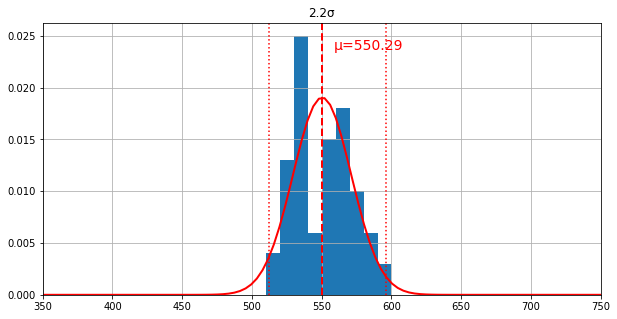

In [46]:
plotWithPdf(arr, xmin=350, xmax=750, bins=np.linspace(350, 750, 41))

#### Dwell Time Distribution

In [47]:
network.getTracks()[0].getBlocks()

In [48]:
network.getTracks()[0].getBlocks()[1]

In [49]:
dwell_time_dist=network.getTracks()[0].getBlocks()[1].dist_dwell_time

In [50]:
dwell_times = dwell_time_dist.rvs(100)

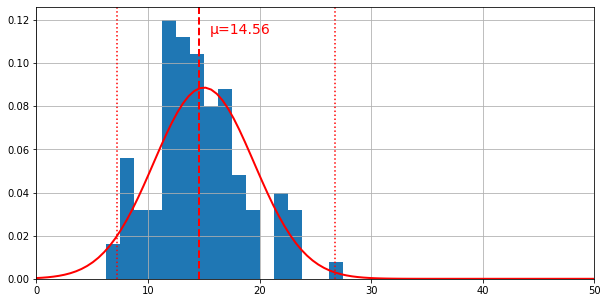

In [51]:
plot(dwell_times, pdf=dwell_time_dist.pdf, xmin=0, xmax=50, bins=np.linspace(0, 50, 41))

#### Inter Departure Time Distribution

In [52]:
dep = DEP[0]['LOND (Station) (L) IDEP']
dep.describe()

count    100.000000
mean     555.517602
std       17.605387
min      519.022673
25%      547.826172
50%      558.160278
75%      566.554755
max      591.384278
Name: LOND (Station) (L) IDEP, dtype: float64

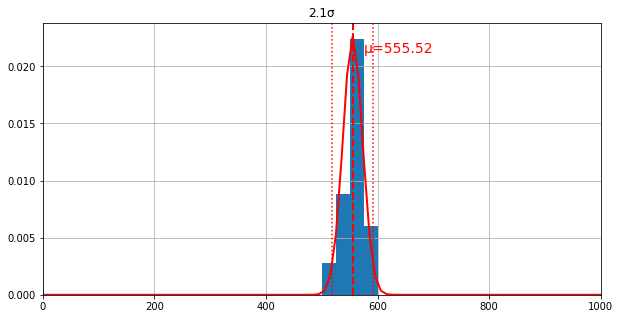

In [53]:
plotWithPdf(dep, xmin=0, xmax=1000, bins=np.linspace(0, 1000, 41))

#### Drive Time Distribution

In [54]:
drive_time_dist=network.getTracks()[0].getBlocks()[1].dist_drive_time

In [55]:
drive_times = drive_time_dist.rvs(100)

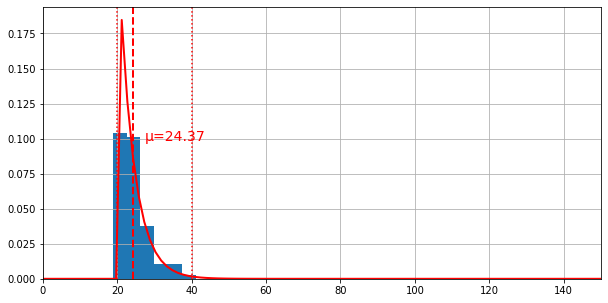

In [56]:
plot(drive_times, pdf=drive_time_dist.pdf, xmin=0, xmax=150, bins=np.linspace(0, 150, 41))

### Birmingham Interchange

In [57]:
ARR[0].columns[1]

'LOND (Station) (L) ARR'

#### Inter Arrival Time Distribution

In [58]:
arr = ARR[0]['BIRM (Station) (L) IARR']
arr.describe()

count    100.000000
mean     563.397461
std       24.005405
min      509.125071
25%      547.905995
50%      559.659922
75%      577.533913
max      639.837512
Name: BIRM (Station) (L) IARR, dtype: float64

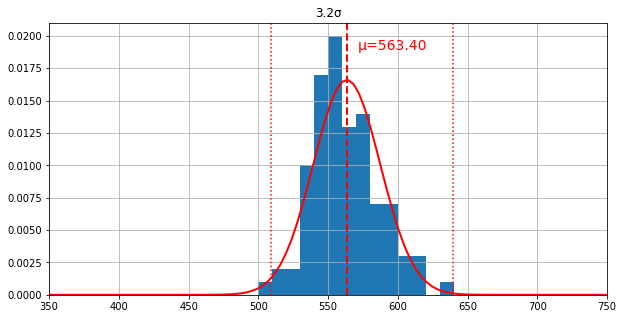

In [59]:
plotWithPdf(arr, xmin=350, xmax=750, bins=np.linspace(350, 750, 41))

#### Dwell Time Distribution

In [60]:
network.getTracks()[0].getBlocks()

In [61]:
network.getTracks()[0].getBlocks()[-2]

In [62]:
dwell_time_dist=network.getTracks()[0].getBlocks()[-2].dist_dwell_time

In [63]:
dwell_times = dwell_time_dist.rvs(100)

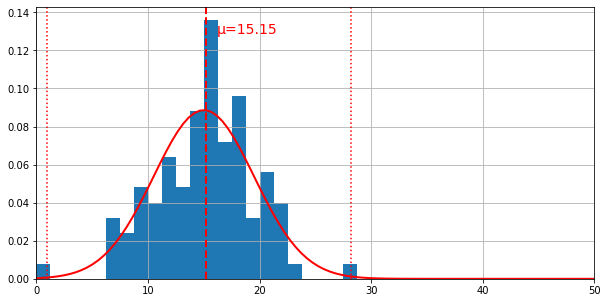

In [64]:
plot(dwell_times, pdf=dwell_time_dist.pdf, xmin=0, xmax=50, bins=np.linspace(0, 50, 41))

#### Inter Departure Time Distribution

In [65]:
dep = DEP[0]['BIRM (Station) (L) IDEP']
dep.describe()

count    100.000000
mean     563.412175
std       24.681504
min      513.890088
25%      546.786262
50%      559.427256
75%      578.016937
max      639.810713
Name: BIRM (Station) (L) IDEP, dtype: float64

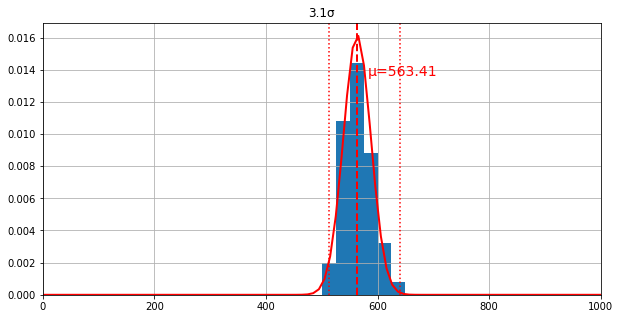

In [66]:
plotWithPdf(dep, xmin=0, xmax=1000, bins=np.linspace(0, 1000, 41))

#### Drive Time Distribution

In [67]:
drive_time_dist=network.getTracks()[0].getBlocks()[-2].dist_drive_time

In [68]:
drive_times = drive_time_dist.rvs(100)

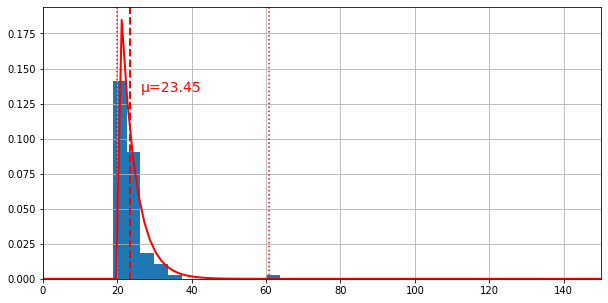

In [69]:
plot(drive_times, pdf=drive_time_dist.pdf, xmin=0, xmax=150, bins=np.linspace(0, 150, 41))

## Delay Time

### Concatinating Arrival and Departure dataframe

In [70]:
trainSummary = pd.DataFrame()
trainSummary = pd.concat([ARR[0], DEP[0]], axis=1)
trainSummary

,LOND (Station) (L) IARR,LOND (Station) (L) ARR,BIRM (Station) (L) IARR,BIRM (Station) (L) ARR,LOND (Station) (L) IDEP,LOND (Station) (L) DEP,BIRM (Station) (L) IDEP,BIRM (Station) (L) DEP
0,539.395598,25235.408273,572.074003,28375.123567,530.131042,25257.396385,568.668298,28390.893069
1,530.032269,25774.803871,555.642094,28947.197570,527.985317,25787.527427,550.434535,28959.561367
2,516.601018,26304.836140,549.210718,29502.839664,521.137555,26315.512744,558.891146,29509.995902
3,531.034165,26821.437157,564.891330,30052.050381,522.121602,26836.650299,559.106529,30068.887048
4,525.795465,27352.471323,545.862926,30616.941711,532.434236,27358.771901,546.313001,30627.993577
...,...,...,...,...,...,...,...,...
95,566.663410,77437.933097,607.313964,81841.344075,557.961864,77979.019792,600.089578,81864.383977
96,559.610474,78004.596507,555.697830,82448.658040,563.752422,78536.981656,558.559052,82464.473555
97,563.522415,78564.206981,537.953205,83004.355869,576.547776,79100.734079,539.004316,83023.032607
98,577.644411,79127.729396,593.774102,83542.309075,554.900720,79677.281854,583.767699,83562.036923


### Creating new dataframe with only Simulated (Departure & Arrival) and others

In [71]:
trainSchd = pd.DataFrame()
trainSchd["LOND-Dep"] = trainSummary["LOND (Station) (L) DEP"]
trainSchd["BIRM-Arr"] = trainSummary["BIRM (Station) (L) ARR"]
trainSchd["Simulated Running Time"] = trainSchd["BIRM-Arr"] - trainSchd["LOND-Dep"]
trainSchd["Scheduled Running Time"] =dt["Running Time"].sum()
trainSchd["Delay Time"] = trainSchd["Simulated Running Time"] - trainSchd["Scheduled Running Time"]
trainSchd

,LOND-Dep,BIRM-Arr,Simulated Running Time,Scheduled Running Time,Delay Time
0,25257.396385,28375.123567,3117.727182,2955.782791,161.944392
1,25787.527427,28947.197570,3159.670143,2955.782791,203.887353
2,26315.512744,29502.839664,3187.326920,2955.782791,231.544129
3,26836.650299,30052.050381,3215.400082,2955.782791,259.617292
4,27358.771901,30616.941711,3258.169810,2955.782791,302.387020
...,...,...,...,...,...
95,77979.019792,81841.344075,3862.324283,2955.782791,906.541492
96,78536.981656,82448.658040,3911.676383,2955.782791,955.893592
97,79100.734079,83004.355869,3903.621791,2955.782791,947.839000
98,79677.281854,83542.309075,3865.027220,2955.782791,909.244429


### Plotting delay time

In [72]:
trainSchd["Delay Time"].describe()

count     100.000000
mean      813.505793
std       198.913806
min       161.944392
25%       842.653166
50%       893.461275
75%       917.208688
max      1006.182182
Name: Delay Time, dtype: float64

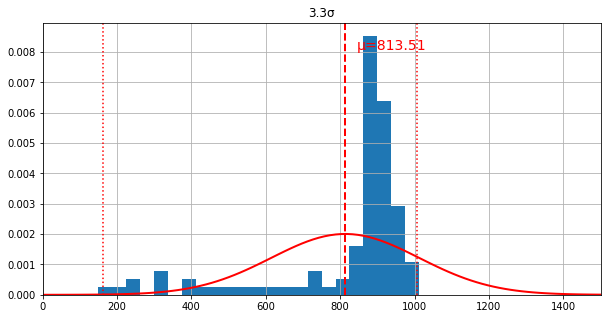

In [73]:
plotWithPdf(trainSchd["Delay Time"], xmin=0, xmax=1500, bins=np.linspace(0, 1500, 41))

## Combine the code into a single routine

### Defining constants

In [74]:
mean=3.378
sigma=0.751
acc=0.76
dec=0.38
vel=86.1
dist=145000
start="07:00:00"
stop="22:00:00"


### Defining function

In [75]:
def runLondBrim(k, log=False):
    global dt 
    dt = blockData(k, mean, sigma, acc, dec, vel, dist)

    dt['start'] = parseTime(start)
    dt['stop']  = parseTime(stop)
    dt['freq']  = dt["Running Time"].mean() + depot_drive_time + depot_dwell_time + signalFreeTime
    np.random.seed(0)

    network = Network()
    if log:
        network.trace()
    env.process(network.process())
    env.run()

    ARR = [ t.getArrData() for t in network.getTracks() ]
    DEP = [ t.getDepData() for t in network.getTracks() ]
    
    trainSummary = pd.DataFrame()
    trainSummary = pd.concat([ARR[0], DEP[0]], axis=1)
    trainSchd = pd.DataFrame()
    trainSchd["LOND-Dep"] = trainSummary["LOND (Station) (L) DEP"]
    trainSchd["BIRM-Arr"] = trainSummary["BIRM (Station) (L) ARR"]
    trainSchd["Simulated Running Time"] = trainSchd["BIRM-Arr"] - trainSchd["LOND-Dep"]
    trainSchd["Scheduled Running Time"] =dt["Running Time"].sum()
    trainSchd["Delay Time"] = trainSchd["Simulated Running Time"] - trainSchd["Scheduled Running Time"]
    
    trainPerHour = trainSchd["Delay Time"].count()//int((parseTime(stop) - parseTime(start))/3600)
    
    
    return trainPerHour, trainSchd["Delay Time"].mean(), trainSummary["BIRM (Station) (L) IARR"].mean()



## Optimisation

### Optimal Schedule

In [76]:
def schedule(k, log=False):
    global dt
    dt = blockData(k, mean, sigma, acc, dec, vel, dist)

    dt['start'] = parseTime(start)
    dt['stop']  = parseTime(stop)
    dt['freq']  = dt["Running Time"].mean() + depot_drive_time + depot_dwell_time + signalFreeTime
    np.random.seed(0)

    network = Network()
    if log:
        network.trace()
    env.process(network.process())
    env.run()

    ARR = [ t.getArrData() for t in network.getTracks() ]
    DEP = [ t.getDepData() for t in network.getTracks() ]

    trainSummary = pd.DataFrame()
    trainSummary = pd.concat([ARR[0], DEP[0]], axis=1)
    trainSchd = pd.DataFrame()
    trainSchd["LOND-Dep"] = trainSummary["LOND (Station) (L) DEP"]
    trainSchd["BIRM-Arr"] = trainSummary["BIRM (Station) (L) ARR"]
    trainSchd["Simulated Running Time"] = trainSchd["BIRM-Arr"] - trainSchd["LOND-Dep"]
    trainSchd["Scheduled Running Time"] =dt["Running Time"].sum()
    trainSchd["Delay Time"] = trainSchd["Simulated Running Time"] - trainSchd["Scheduled Running Time"]

    return trainSchd

In [77]:
blk = 11
env = simpy.Environment()
traS = schedule(blk)
sch = traS[["LOND-Dep","BIRM-Arr","Delay Time"]]
sch["Delay Time"].describe()

count    131.000000
mean     820.694931
std      106.295270
min      156.912849
25%      814.703084
50%      836.589279
75%      861.994004
max      931.174085
Name: Delay Time, dtype: float64

### Delay distribution

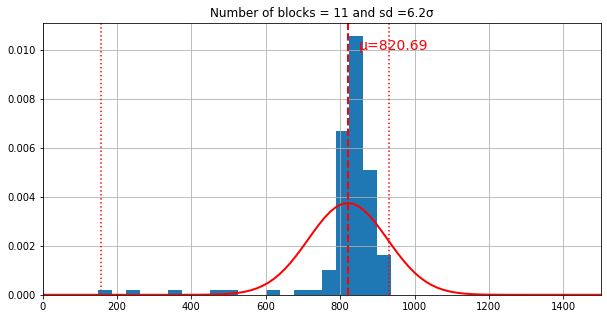

In [80]:
plotWithPdf(sch["Delay Time"], xmin=0, xmax=1500, bins=np.linspace(0, 1500, 41), title=f"Number of blocks = {blk}")

In [81]:
sch["LOND-Dep"] = sch["LOND-Dep"].apply(lambda x: time.strftime('%H:%M:%S', time.gmtime(x)))
sch["BIRM-Arr"] = sch["BIRM-Arr"].apply(lambda x: time.strftime('%H:%M:%S', time.gmtime(x)))
sch["Delay Time"] = sch["Delay Time"].apply(lambda x: time.strftime('%H:%M:%S', time.gmtime(x)))

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [82]:
sch.head(10)

,LOND-Dep,BIRM-Arr,Delay Time
0,07:00:57,08:11:54,00:02:36
1,07:07:45,08:20:15,00:04:10
2,07:14:25,08:28:41,00:05:55
3,07:21:14,08:37:13,00:07:39
4,07:28:00,08:44:55,00:08:35
5,07:34:39,08:53:34,00:10:34
6,07:41:32,09:01:20,00:11:28
7,07:48:18,09:10:41,00:14:02
8,07:55:53,09:18:42,00:14:28
9,08:04:19,09:26:05,00:13:26


### Generating N, inter-arival time and delay time

In [83]:
random.seed(0)
kList = range(2,15)
n=len(kList)
sdata = pd.DataFrame()
sdata['K'] = [None]*n
sdata['N'] = [None]*n
sdata['Delay Time'] = [None]*n
sdata['BIRM-IARR'] = [None]*n

for i in range(n):
    env = simpy.Environment()
    n, delayTime, iarr = runLondBrim(kList[i], log=False)
    
    sdata.at[i, 'K'] = kList[i]
    sdata.at[i, 'N'] = n
    sdata.at[i, 'Delay Time'] = delayTime
    sdata.at[i, 'BIRM-IARR'] = iarr
sdata

,K,N,Delay Time,BIRM-IARR
0,2,3,575.545,1080.18
1,3,4,136.531,804.841
2,4,5,213.325,659.327
3,5,6,149.543,588.188
4,6,7,614.103,520.761
5,7,7,747.256,533.908
6,8,7,1380.78,554.786
7,9,8,558.765,439.512
8,10,8,381.813,408.01
9,11,8,681.668,476.198


In [84]:

max = int(sdata.loc[sdata["Delay Time"] <= sdata["BIRM-IARR"]/2]["N"].max())
sdata.loc[(sdata["Delay Time"] <= sdata["BIRM-IARR"]/2) & (sdata["N"] == max)]

,K,N,Delay Time,BIRM-IARR
3,5,6,149.543,588.188


In [85]:
sdata.loc[(sdata["Delay Time"] <= sdata["BIRM-IARR"]/2) & (sdata["N"] == max)][["K","N"]]

,K,N
3,5,6


In [86]:
blk = int(sdata.loc[(sdata["Delay Time"] <= sdata["BIRM-IARR"]/2) & (sdata["N"] == max)][["K","N"]]["K"])
blk

5

### Coefficient calculating

In [87]:
np.random.seed(41)
pd.options.mode.chained_assignment = None
target = pd.DataFrame(sdata['N'])
predictor = pd.DataFrame(sdata[['BIRM-IARR', 'Delay Time','K']])
predictor = sm.add_constant(predictor)


model = sm.OLS(target.astype(float), predictor.astype(float)).fit()
predictions = model.predict(predictor)
model.summary()

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      N   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     255.3
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           5.05e-09
Time:                        22:54:16   Log-Likelihood:                 2.4538
No. Observations:                  13   AIC:                             3.092
Df Residuals:                       9   BIC:                             5.352
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8894      0.617     12.794      0.000       6.494       9.284
BIRM-IARR     -0.0054      0.001     -8.051      0.000      -0.007      -0.004
Delay Time     0.0005      0.000      1.922      0.087   -8.02e-05       0.001
K              0.2225      0.036      6.101      0.000       0.140       0.305
==============================================================================
Omnibus:                        1.192   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                0.762
Skew:                          -0.162   Prob(JB):                        0.683
Kurtosis:                       1.859   Cond. No.                     7.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Programming optimisation

#### Using sklearn.linear_model.LinearRegression

In [88]:
objective = [model.params['const'], model.params['K'], model.params['Delay Time'], model.params['BIRM-IARR']]
lhs_ineq = [[ 0,0,1,  1]]
rhs_ineq = [0.5]
bounds = [(1,1),
       (2, 15),
       (100,600),
       (260, 1200)]
lOptimise = linprog(c=objective, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds = bounds, method="revised simplex")

In [89]:
lOptimise

     con: array([], dtype=float64)
     fun: 6.97472660936872
 message: 'The problem appears infeasible, as the phase one auxiliary problem terminated successfully with a residual of 3.6e+02, greater than the tolerance 1e-12 required for the solution to be considered feasible. Consider increasing the tolerance to be greater than 3.6e+02. If this tolerance is unnaceptably large, the problem is likely infeasible.'
     nit: 0
   slack: array([-359.5])
  status: 2
 success: False
       x: array([  1.,   2., 100., 260.])

<font color=blue>
    
- Max trains = 6
- Blocks = 2

### Integer Programming optimisation

#### Using Pulp

In [114]:
x = pulp.LpVariable("BIRM-IARR", lowBound = 0, upBound=1)
y = pulp.LpVariable("Delay Time", lowBound = 0, upBound=1)
z = pulp.LpVariable("K", lowBound = 2, upBound=15, cat=pulp.LpInteger)

In [115]:
prob = pulp.LpProblem('Problem', pulp.LpMaximize)

In [116]:
prob+=model.params['const'] + model.params['K']*x + model.params['Delay Time']*y + model.params['BIRM-IARR']*y

In [117]:
prob+= y<= (1/2)*x
prob+= z>= 2
prob

Problem:
MAXIMIZE
0.22253257078951172*BIRM_IARR + -0.004950617385175462*Delay_Time + 7.889423960839332
SUBJECT TO
_C1: - 0.5 BIRM_IARR + Delay_Time <= 0

_C2: K >= 2

VARIABLES
BIRM_IARR <= 1 Continuous
Delay_Time <= 1 Continuous
2 <= K <= 15 Integer

In [118]:
status = prob.solve()

In [119]:
pulp.LpStatus[status]

'Optimal'

In [120]:
prob.objective

0.22253257078951172*BIRM_IARR + -0.004950617385175462*Delay_Time + 7.889423960839332

In [121]:
int(pulp.value(prob.objective)//1)

8

In [123]:
pulp.value(z)

2.0

### Monte Carlo

#### Loss function

In [110]:
def f(x,y,z):
    return model.params['const'] + model.params['K']*x + model.params['Delay Time']*y + model.params['BIRM-IARR']*y

####  Monte Carlo Optimisation

In [111]:
def monte_carlo(n, xmin=4, xmax=11, ymin=120, ymax=300, zmin = 300, zmax = 600):
    x = [ random.randint(xmin, xmax) for i in range(n)]
    y = [ random.randint(ymin, ymax) for i in range(n)]
    z = [ random.randint(zmin, zmax) for i in range(n)]
    xp = [ x[0] ]
    yp = [ y[0] ]
    zp = [ z[0] ]
    fmax = f(xp[0], yp[0],zp[0])
   
    for i in range(1, len(x)):
        if y[i] <= z[i]/2:
            fi = f(x[i], y[i],z[i])
       
            if fi > fmax:
                xp += [x[i]]
                yp += [y[i]]
                zp += [z[i]]
                fmax = fi

    xs = np.linspace(xmin, xmax, 100)
    ys = np.linspace(ymin, ymax, 100)
    zs = np.linspace(zmin, zmax, 100)
    xx, yy, zz = np.meshgrid(xs, ys, zs)
    t=f(xx, yy, zz)
    t = t.reshape((-1,100))
    t = t[:100,:]
    fig, ax= plt.subplots(1, 1)
    fig.set_figwidth(6)
    fig.set_figheight(5)
    cs = ax.contour(xs, ys,t,100)
    fig.colorbar(cs, ax=ax)

       
    plt.scatter(x, y, c='red', marker='.')
    plt.plot(xp, yp, c='red')
    plt.title(f"(K, Delay Time, IAAR, N) = {xp[-1], yp[-1], zp[-1], int(f(xp[-1], yp[-1], zp[-1]))}")
       
    return len(xp), xp[-1], yp[-1], zp[-1], int(f(xp[-1], yp[-1], zp[-1]))

(4, 11, 140, 576, 9)

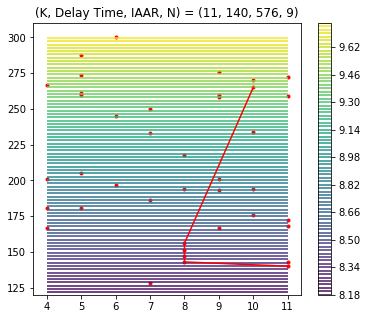

In [112]:
random.seed(0)
monte_carlo(40)

(4, 11, 120, 520, 9)

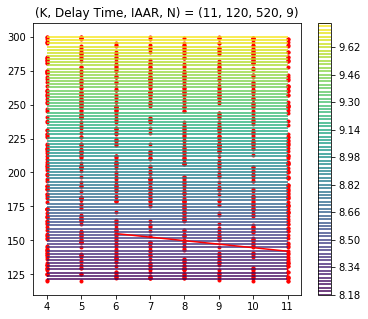

In [113]:
random.seed(1)
_,oK,oDelay,oIARR,oN = monte_carlo(1000)
_,oK,oDelay,oIARR,oN

<font color=blue>
    
- Max trains = 9
- Blocks = 11

## Conclusion

<font color=blue>

Overall, from simulation and optimisation, the best results are optimised using Monte Carlo and details are below for a track:
- Max trains per hour = 9
- With Block = 11
    
Given that the average delay time should not be higher than half the scheduled time between consecutive trains.

## References

[1] Yuxiang Yang, Ping Huang, Qiyuan Peng, Jie Li, Chao Wen: Statistical delay distribution analysis on high-speed railway trains. J. Mod. Transport. (2019) 27(3):188–197 https://link.springer.com/content/pdf/10.1007/s40534-019-0188-z.pdf